In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import folium
from folium import plugins
from scipy.stats import skew
import math

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

In [3]:
df = pd.read_excel('Real_estate_Taiwan.xlsx', sheet_name=['data'])
df = df['data']

In [4]:
df = df.drop('No', axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
df_4 = df.copy()

In [8]:
#df_4 = df[['X1 transaction date', 'X2 house age',
#           'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']]

In [9]:
df_4.shape

(414, 7)

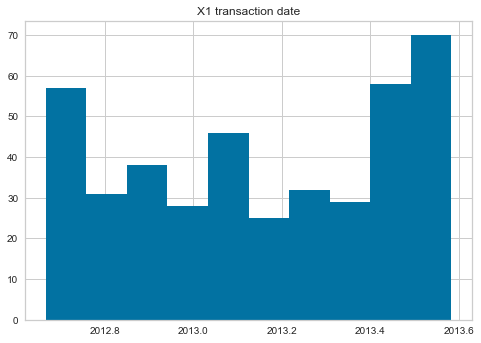

		skew =  -0.1502872935813866


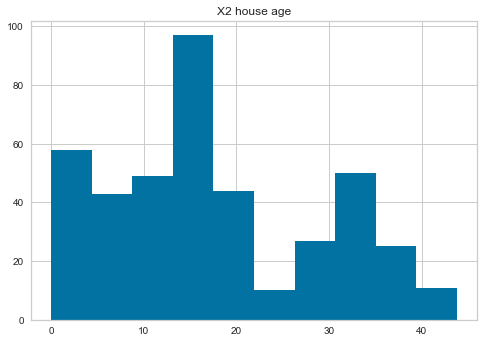

		skew =  0.38153741817729087


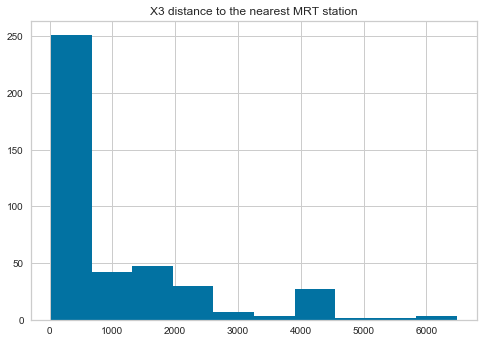

		skew =  1.881906360114803


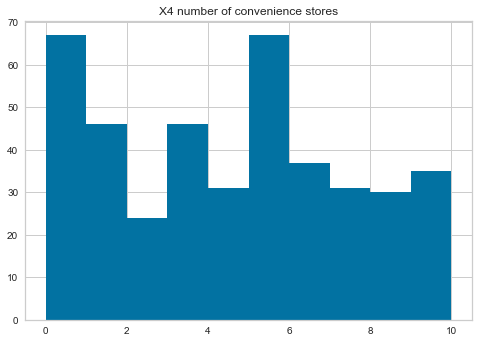

		skew =  0.1540458341286463


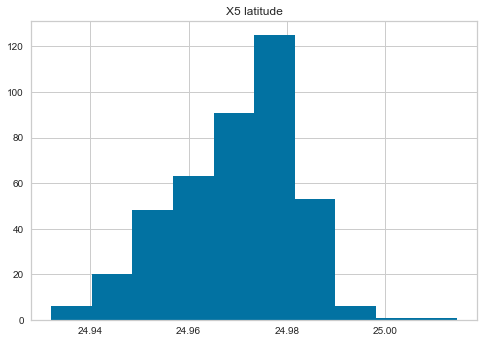

		skew =  -0.437007718167982


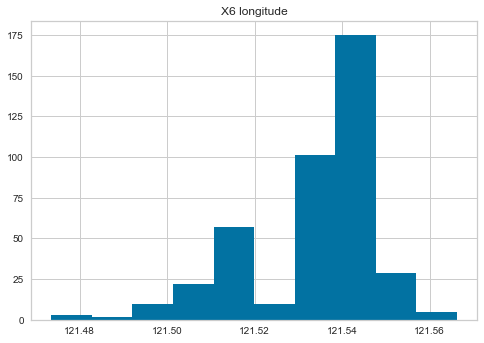

		skew =  -1.2151682334073404


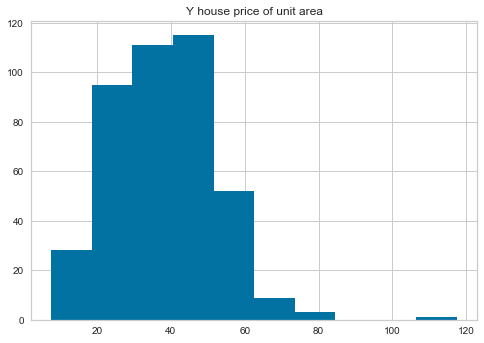

		skew =  0.5976770142537495


In [10]:
for indx in range(0, len(df_4.columns)):
    plt.title(df_4.columns[indx])
    plt.hist(df[df_4.columns[indx]])
    plt.show()
    print('\t\tskew = ',skew(df_4[df_4.columns[indx]]))

#### 1. Simple Linear Regression

In [11]:
def linear_model(X_value, y_value):
    """X_value, y_value, predict_value : DataFrame"""
    X_train, X_test, y_train, y_test = train_test_split(X_value, y_value, test_size = 0.2, random_state = 0)
    SC = MinMaxScaler()
    X_SC = SC.fit_transform((X_train))
    X_SC_test = SC.transform((X_test))
    model = LinearRegression()   
        
    model.fit(X_SC, y_train)
    yhat = model.predict(X_SC_test)
    
    R2_train = model.score(X_SC, y_train)
    R2_test = model.score(X_SC_test, y_test)
    RMSE = mean_squared_error(y_test, yhat, squared=False)
    
    scores_4 = cross_val_score(model, X_value, y_value, cv=4)
    scores_5 = cross_val_score(model, X_value, y_value, cv=5)

    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [12]:
X_simple = df_4[['X3 distance to the nearest MRT station']]
y = df_4[['Y house price of unit area']]

In [13]:
RMSE_1, R2_train_1, R2_test_1, scores_4_1, scores_5_1, model_1 = linear_model(X_simple, y)

In [14]:
RMSE_1, R2_train_1, R2_test_1, scores_4_1, scores_5_1, model_1

(9.16945010632223,
 0.43911697318738707,
 0.5159511050792798,
 array([0.52597284, 0.48374575, 0.32811145, 0.49743352]),
 array([0.52782696, 0.44336161, 0.49797027, 0.31278043, 0.52726327]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

#### 2. Multi-Linear Regression

In [15]:
X_multy = df_4.drop('Y house price of unit area', axis = 1)

In [16]:
RMSE_2, R2_train_2, R2_test_2, scores_4_2, scores_5_2, model_2 = linear_model(X_multy, y)

In [17]:
RMSE_2, R2_train_2, R2_test_2, scores_4_2, scores_5_2, model_2 

(7.714713081140835,
 0.5648155773967247,
 0.657356729182857,
 array([0.72461496, 0.53024266, 0.45982964, 0.58102307]),
 array([0.71179668, 0.51938519, 0.66182298, 0.43950453, 0.59327027]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

#### 3. Polynomial Regression

In [18]:
def poly_reg(X, y, deg):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = MinMaxScaler()
    poly = PolynomialFeatures(degree = deg, include_bias = False)
    mol = LinearRegression()

    X_train_normalize = SC.fit_transform(X_train)
    X_test_normalize = SC.transform(X_test)
    
    X_train_poly = poly.fit_transform(X_train_normalize)
    X_test_poly = poly.transform(X_test_normalize)
    
    model = mol.fit(X_train_poly, y_train)
    
    y_test_pred = model.predict(X_test_poly)
    
    R2_train = model.score(X_train_poly, y_train)
    R2_test = model.score(X_test_poly, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5) 

    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [19]:
RMSE_3, R2_train_3, R2_test_3, scores_4_3, scores_5_3, model_3 = poly_reg(X_multy, y, 3)
RMSE_4, R2_train_4, R2_test_4, scores_4_4, scores_5_4, model_4 = poly_reg(X_multy, y, 4)

In [20]:
RMSE_3, R2_train_3, R2_test_3, scores_4_3, scores_5_3, model_3

(7.680641974137381,
 0.77281039490654,
 0.6603765321203021,
 array([0.72461496, 0.53024266, 0.45982964, 0.58102307]),
 array([0.71179668, 0.51938519, 0.66182298, 0.43950453, 0.59327027]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

In [21]:
RMSE_4, R2_train_4, R2_test_4, scores_4_4, scores_5_4, model_4

(65.40009539609673,
 0.8992292992764739,
 -23.624045962825896,
 array([0.72461496, 0.53024266, 0.45982964, 0.58102307]),
 array([0.71179668, 0.51938519, 0.66182298, 0.43950453, 0.59327027]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

#### 4. Support Vector Regression

def svm_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = MinMaxScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
             'C' : [1,5,10],'degree' : [3,8], 'gamma' : ('auto','scale')}
    
    #model = GridSearchCV(SVR(), param, refit = True) 
    model = SVR(kernel = 'linear', C=1, epsilon=0.01)
    model.fit(X_train_nor, y_train)
    
    y_test_pred = model.predict(X_test_nor)
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

RMSE_5, R2_train_5, R2_test_5, scores_4_5, scores_5_5, model_5 = svm_reg(X_multy, y)

RMSE_5, R2_train_5, R2_test_5, scores_4_5, scores_5_5, model_5

#### 5. K-NN Regression

In [22]:
def knn_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = MinMaxScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    param_grid = {'n_neighbors' : [2, 3, 4, 5, 7, 10]}
    model = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose = 3) 
    
    #model = KNeighborsRegressor(n_neighbors=num_of_neighbor)
    model.fit(X_train_nor, y_train)

    y_test_pred = model.predict(X_test_nor)
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [23]:
RMSE_6, R2_train_6, R2_test_6, scores_4_6, scores_5_6, model_6 = knn_reg(X_multy, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.405, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.634, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.753, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.405, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.001, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.451, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.662, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.793, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.438, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.395, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.431, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.663, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.773, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.625, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.666, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.464, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.541, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.678, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.612, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.327, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.628, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.708, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.636, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.533, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.415, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.660, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.618, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.721, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.293, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.695, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.711, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.646, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.769, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.652, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.797, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.580, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ...................... n_neighbors=2, score=-0.129, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.460, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.632, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.741, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.399, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.477, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.672, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.629, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.744, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.417, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.634, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.493, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.573, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.503, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.705, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.731, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.525, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.371, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.694, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.651, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.662, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.509, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.409, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.719, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.728, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.354, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.711, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.668, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.631, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.746, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.423, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.734, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.595, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.308, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.412, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.671, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.714, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.705, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [24]:
RMSE_6, R2_train_6, R2_test_6, scores_4_6, scores_5_6, model_6

(7.397046463659814,
 0.6640941256096055,
 0.6849936250874866,
 array([0.71641225, 0.64121861, 0.51392773, 0.57127502]),
 array([0.66846817, 0.63665282, 0.6097597 , 0.51819343, 0.69408332]),
 GridSearchCV(cv=None, error_score=nan,
              estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
              iid='deprecated', n_jobs=None,
              param_grid={'n_neighbors': [2, 3, 4, 5, 7, 10]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring=None, verbose=3))

#### 6. Decision Tree Regression

In [25]:
def decision_tree_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = MinMaxScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    param_grid = {'max_depth' : [2, 3, 4, 5, 7, 10]}
    model = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3) 
    
    #model = DecisionTreeRegressor(max_depth=max_depth_tree)
    model.fit(X_train_nor, y_train)
    
    y_test_pred = model.predict(X_test_nor)
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [26]:
RMSE_7, R2_train_7, R2_test_7, scores_4_7, scores_5_7, model_7 = decision_tree_reg(X_multy, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.539, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.636, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.679, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.406, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.559, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.598, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ......................... max_depth=5, score=0.495, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.597, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.634, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.731, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.342, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.451, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ........................ max_depth=10, score=0.548, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.637, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.288, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.686, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.386, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.549, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.663, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ........................ max_depth=4, score=-0.445, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.625, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.381, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.475, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.628, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.726, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.557, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.350, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... max_depth=3, score=0.650, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.740, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.495, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.747, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.724, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.632, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.771, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ......................... max_depth=3, score=0.735, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.719, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.687, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.705, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.478, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.744, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.694, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.734, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.423, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.433, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.670, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.590, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.790, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.447, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.303, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.661, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.326, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.551, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.529, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.213, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.617, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ......................... max_depth=4, score=0.476, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.480, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.234, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.659, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.462, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.447, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.500, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.621, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.797, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.553, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.712, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.665, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.653, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.817, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.301, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.726, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.510, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.753, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.715, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.404, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.652, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [27]:
RMSE_7, R2_train_7, R2_test_7, scores_4_7, scores_5_7, model_7

(10.959806360379767,
 0.7904630013661419,
 0.30847416206715517,
 array([0.71000553, 0.61774085, 0.48071298, 0.32321448]),
 array([0.72328058, 0.49399506, 0.66300657, 0.46320087, 0.24524227]),
 GridSearchCV(cv=None, error_score=nan,
              estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='

#### 7. Random Forest Regresison

In [28]:
def randomforest_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = MinMaxScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    n_estimators = [5, 10, 12, 14, 15, 20, 25, 30, 40, 50, 70]
    max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    random_grid = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    randomforest_model = RandomForestRegressor()
    rd_search = RandomizedSearchCV(estimator = randomforest_model,
                                   param_distributions = random_grid, n_iter = 100, cv = 3,
                                   verbose=2, random_state=42, n_jobs = -1)
    model = rd_search.fit(X_train_nor, y_train)
    
    y_test_pred = model.predict(X_test_nor)
    
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [29]:
RMSE_8, R2_train_8, R2_test_8, scores_4_8, scores_5_8, model_8 = randomforest_reg(X_multy, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.6s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    6.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.7s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    6.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.6s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.9s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    7.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.3s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    6.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.9s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.1s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.1s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    7.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.6s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.5s finished
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [30]:
RMSE_8, R2_train_8, R2_test_8, scores_4_8, scores_5_8, model_8

(7.666910383198153,
 0.9021034901137958,
 0.6615898165676204,
 array([0.79375447, 0.68973964, 0.58131364, 0.69648146]),
 array([0.76550092, 0.63037341, 0.78952188, 0.55064795, 0.71711184]),
 RandomizedSearchCV(cv=3, error_score=nan,
                    estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                   

## REPORT

In [31]:
array_model = ['Simple Linear Regresison', 
              'Multiple Linear Regresison',
              'Polynomial Linear Regression', 
              'Polynomial Linear Regression',
              'K-NN Regression', 
              'Decision Tree Regressison', 
              'Random Forest Regression']

In [32]:
array_feature_details = ['X3 distance to the nearest MRT station', 'all feature(except target)',
                         'all feature(except target)',
                         'all feature(except target)',
                         'all feature(except target)', 'all feature(except target)',
                         'all feature(except target)']

In [33]:
array_RMSE = [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_6,
              RMSE_7, RMSE_8]

In [34]:
array_R2_train = [R2_train_1, R2_train_2, R2_train_3, R2_train_4, R2_train_6,
                  R2_train_7, R2_train_8]

In [35]:
array_R2_test = [R2_test_1, R2_test_2, R2_test_3, R2_test_4, R2_test_6,
                  R2_test_7, R2_test_8]

In [40]:
array_4_fold = []
array_5_fold = []
scores4 = [scores_4_1, scores_4_2, scores_4_3, scores_4_4, scores_4_6,
                scores_4_7, scores_4_8]

scores5 = [scores_5_1, scores_5_2, scores_5_3, scores_5_4, scores_5_6,
                scores_5_7, scores_5_8]
for val4, val5 in zip(scores4, scores5):
    array_4_fold.append([np.min(val4), np.mean(val4), np.max(val4)])
    array_5_fold.append([np.min(val5), np.mean(val5), np.max(val5)])

In [47]:
table_report = pd.DataFrame(np.array([array_model, array_feature_details, array_RMSE,
                       array_R2_train, array_R2_test, array_4_fold, array_5_fold])).T

In [48]:
table_report.columns = ['Model', 'Feature Details', 'RMSE', 'R2 Train', 'R2 Test', '4-Fold', '5-Fold']

In [49]:
table_report

,Model,Feature Details,RMSE,R2 Train,R2 Test,4-Fold,5-Fold
0,Simple Linear Regresison,X3 distance to the nearest MRT station,9.16945,0.439117,0.515951,"[0.3281114549254609, 0.45881589126251887, 0.52...","[0.3127804287862933, 0.46184050812520117, 0.52..."
1,Multiple Linear Regresison,all feature(except target),7.71471,0.564816,0.657357,"[0.4598296380112954, 0.5739275829403221, 0.724...","[0.4395045253334804, 0.5851559288125879, 0.711..."
2,Polynomial Linear Regression,all feature(except target),7.68064,0.77281,0.660377,"[0.4598296380112954, 0.5739275829403221, 0.724...","[0.4395045253334804, 0.5851559288125879, 0.711..."
3,Polynomial Linear Regression,all feature(except target),65.4001,0.899229,-23.624,"[0.4598296380112954, 0.5739275829403221, 0.724...","[0.4395045253334804, 0.5851559288125879, 0.711..."
4,K-NN Regression,all feature(except target),7.39705,0.664094,0.684994,"[0.5139277261728696, 0.6107084032835497, 0.716...","[0.5181934323240132, 0.625431487405147, 0.6940..."
5,Decision Tree Regressison,all feature(except target),10.9598,0.790463,0.308474,"[0.3232144841724829, 0.532918460688705, 0.7100...","[0.2452422726586532, 0.517745071122038, 0.7232..."
6,Random Forest Regression,all feature(except target),7.66691,0.902103,0.66159,"[0.5813136447582238, 0.6903223024945345, 0.793...","[0.5506479458068017, 0.6906311986333582, 0.789..."


Kiểm tra giá trị score của 4-Fold và 5-Fold:

In [50]:
for val4, val5 in zip(scores4, scores5):
    if (np.mean(val4) and np.mean(val5)) > 0.5:
        print(np.mean(val4), np.mean(val5))
    else:
        print(False)

False
0.5739275829403221 0.5851559288125879
0.5739275829403221 0.5851559288125879
0.5739275829403221 0.5851559288125879
0.6107084032835497 0.625431487405147
0.532918460688705 0.517745071122038
0.6903223024945345 0.6906311986333582


Model đầu tiên không thỏa điều kiện, nên ta loại bỏ, chọn các model còn lại

In [51]:
table = table_report[1:]

Thêm các điều kiện khác

In [52]:
table = table_report[table_report['RMSE']<8.0]
table = table[table['R2 Train'] > 0.5]
table = table[table['R2 Test'] > 0.5]
table

,Model,Feature Details,RMSE,R2 Train,R2 Test,4-Fold,5-Fold
1,Multiple Linear Regresison,all feature(except target),7.71471,0.564816,0.657357,"[0.4598296380112954, 0.5739275829403221, 0.724...","[0.4395045253334804, 0.5851559288125879, 0.711..."
2,Polynomial Linear Regression,all feature(except target),7.68064,0.77281,0.660377,"[0.4598296380112954, 0.5739275829403221, 0.724...","[0.4395045253334804, 0.5851559288125879, 0.711..."
4,K-NN Regression,all feature(except target),7.39705,0.664094,0.684994,"[0.5139277261728696, 0.6107084032835497, 0.716...","[0.5181934323240132, 0.625431487405147, 0.6940..."
6,Random Forest Regression,all feature(except target),7.66691,0.902103,0.66159,"[0.5813136447582238, 0.6903223024945345, 0.793...","[0.5506479458068017, 0.6906311986333582, 0.789..."


### Clustering

In [53]:
df_clus = df.copy()

In [54]:
clus = df_clus[['X5 latitude', 'X6 longitude']]
clus.dtypes

X5 latitude     float64
X6 longitude    float64
dtype: object

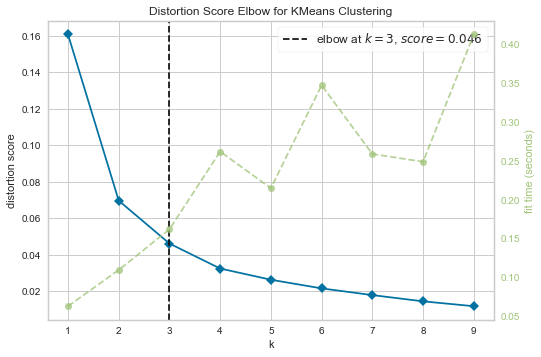

In [55]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10)) 
visualizer.fit(clus)
visualizer.show()

In [59]:
kmeans = KMeans(n_clusters = 3, random_state = 0) 
kmeans.fit(clus)
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(centroids, columns = ['X5 latitude', 'X6 longitude'])
clocation

,X5 latitude,X6 longitude
0,24.961500,121.543126
1,24.978861,121.538537
2,24.956482,121.507876


C:\Users\aquar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


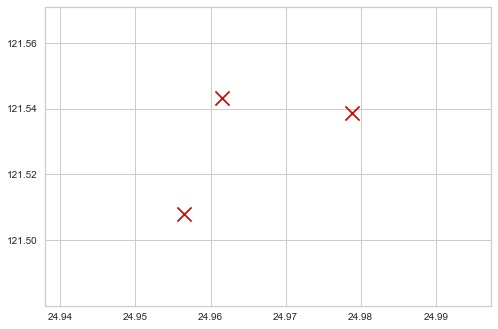

In [60]:
plt.scatter(clocation['X5 latitude'], clocation['X6 longitude'], marker = "x", color = 'R', s = 200)

In [61]:
import folium
centroid = clocation.values.tolist()

m = folium.Map(location = [24.968, 121.53], zoom_start = 13)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(m)

m

In [62]:
label = kmeans.labels_
df_clus['Clusters'] = label
df_clus

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Clusters
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,1
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,1
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4,2
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0,1
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6,1
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5,0


C:\Users\aquar\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aquar\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


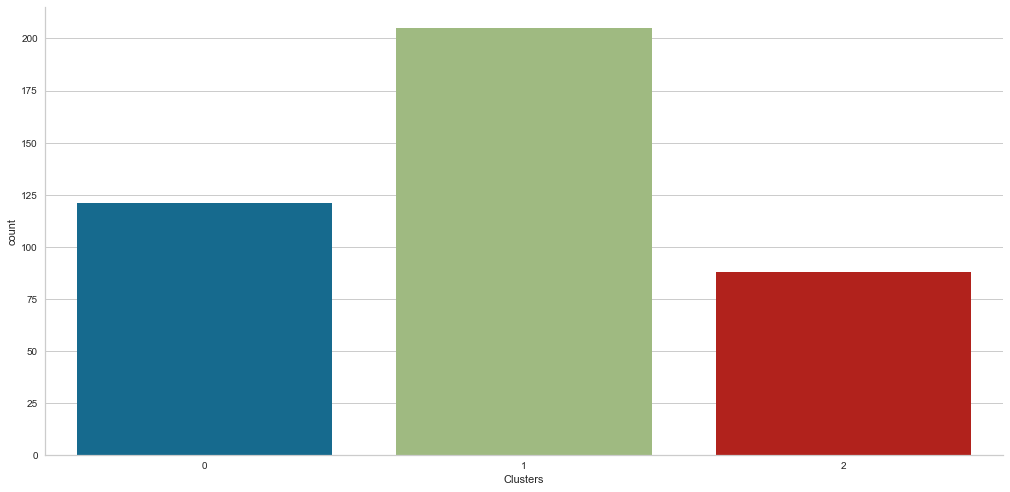

In [64]:
sb.factorplot(data = df_clus, x = "Clusters", kind = "count", size = 7, aspect = 2)

* Visualize location by price 

In [66]:
sorted(df_clus['Y house price of unit area'].unique())

[7.6,
 11.2,
 11.6,
 12.2,
 12.8,
 12.9,
 13.0,
 13.2,
 13.4,
 13.7,
 13.8,
 14.4,
 14.7,
 15.0,
 15.4,
 15.5,
 15.6,
 15.9,
 16.1,
 16.7,
 17.4,
 17.7,
 18.2,
 18.3,
 18.6,
 18.8,
 19.0,
 19.1,
 19.2,
 20.0,
 20.5,
 20.7,
 20.8,
 20.9,
 21.3,
 21.4,
 21.5,
 21.7,
 21.8,
 22.0,
 22.1,
 22.3,
 22.6,
 22.8,
 22.9,
 23.0,
 23.1,
 23.2,
 23.5,
 23.6,
 23.7,
 23.8,
 23.9,
 24.4,
 24.5,
 24.6,
 24.7,
 24.8,
 25.0,
 25.3,
 25.5,
 25.6,
 25.7,
 25.9,
 26.2,
 26.5,
 26.6,
 26.9,
 27.0,
 27.3,
 27.7,
 28.1,
 28.4,
 28.5,
 28.6,
 28.8,
 28.9,
 29.3,
 29.4,
 29.5,
 29.7,
 29.8,
 30.0,
 30.1,
 30.5,
 30.6,
 30.7,
 30.8,
 30.9,
 31.1,
 31.3,
 31.5,
 31.6,
 31.7,
 31.9,
 32.1,
 32.2,
 32.4,
 32.5,
 32.9,
 33.1,
 33.4,
 33.6,
 34.0,
 34.1,
 34.2,
 34.3,
 34.4,
 34.6,
 34.7,
 35.1,
 35.3,
 35.5,
 35.6,
 35.7,
 36.2,
 36.3,
 36.5,
 36.6,
 36.7,
 36.8,
 36.9,
 37.0,
 37.2,
 37.3,
 37.4,
 37.5,
 37.7,
 37.8,
 37.9,
 38.1,
 38.2,
 38.3,
 38.4,
 38.5,
 38.6,
 38.8,
 38.9,
 39.0,
 39.1,
 39.3,
 39.4,
 39.5,


In [67]:
location=df_clus[['X5 latitude','X6 longitude','Y house price of unit area']]
location['color']=location['Y house price of unit area'].apply(lambda price:"Black" if price>=100 else
                                         "green" if price>=90 and price<100 else
                                         "Orange" if price>=80 and price<90 else
                                         "darkblue" if price>=70 and price<80 else
                                         "red" if price>=60 and price<70 else
                                         "lightblue" if price>=50 and price<60 else
                                         "brown" if price>=40 and price<50 else
                                         "grey" if price>=30 and price<40 else
                                         "yellow" if price>=20 and price<30 else
                                         "blue" if price>=10 and price<20 else
                                         "white")
location['size']=location['Y house price of unit area'].apply(lambda price:19 if price>=100 else
                                         17 if price>=90 and price<100 else
                                         15 if price>=80 and price<90 else
                                         13 if price>=70 and price<80 else
                                         11 if price>=60 and price<70 else
                                         9 if price>=50 and price<60 else
                                         7 if price>=40 and price<50 else
                                         5 if price>=30 and price<40 else
                                         3 if price>=20 and price<30 else
                                         1 if price>=10 and price<20 else
                                         0.1)
location

C:\Users\aquar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aquar\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,X5 latitude,X6 longitude,Y house price of unit area,color,size
0,24.98298,121.54024,37.9,grey,5.0
1,24.98034,121.53951,42.2,brown,7.0
2,24.98746,121.54391,47.3,brown,7.0
3,24.98746,121.54391,54.8,lightblue,9.0
4,24.97937,121.54245,43.1,brown,7.0
...,...,...,...,...,...
409,24.94155,121.50381,15.4,blue,1.0
410,24.97433,121.54310,50.0,lightblue,9.0
411,24.97923,121.53986,40.6,brown,7.0
412,24.96674,121.54067,52.5,lightblue,9.0


In [68]:
m_2 = folium.Map(location = [24.968, 121.53], zoom_start = 13)
#location=location[0:2000]
for lat,lon,price,color,size in zip(location['X5 latitude'],location['X6 longitude'],location['Y house price of unit area'],location['color'],location['size']):
     folium.CircleMarker([lat, lon],
                            popup=price,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m_2)
m_2

In [69]:
from folium import plugins
location_data = location[['X5 latitude', 'X6 longitude']]

# plot heatmap
m_2.add_children(plugins.HeatMap(location_data, radius=15))

C:\Users\aquar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """
